# Attribute types across the whole dataset

A notebook that display attribute type data across the whole dataset.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# install libraries
!pip install -r ../requirements.txt

# import libraries
import visualising_poetry.data as vpd
import visualising_poetry.widgets as vpw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn
import ipywidgets as widgets
from IPython.display import display, HTML

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

## Distinct attribution types

The dataset has the following distinct attribution types. Note that Pandas converts 
n/a values from the Excel files into NaN.

In [2]:
types_count = df['attribution type'].unique()
display(types_count)

array(['m.pseud', 'm.d.e.', 'nan', 'p/n', 'ini', 'f.d.e.', 'same',
       'f.pseud', 'pseud', 'same (p/n)', '?', '--', 'f.pseud/f.d.e.'],
      dtype=object)

## Numbers of attribution types

Calculate the number of occurrences that an attribution occurs against the whole dataset, and give a % of that
count against the total:

,attribution type,occurrences,% of total
0,nan,6428,62.742801
1,p/n,1241,12.113226
2,ini,1140,11.127379
3,m.pseud,862,8.413860
4,m.d.e.,315,3.074671
5,f.pseud,122,1.190825
6,f.d.e.,103,1.005368
7,same,26,0.253782
8,pseud,3,0.029283
9,--,2,0.019522


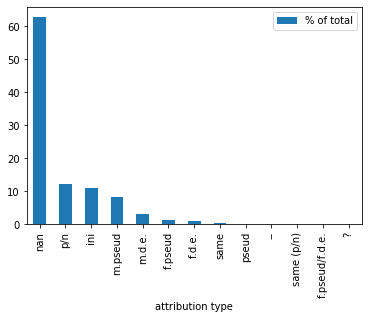

In [3]:
attr_type_count = vpd.attribute_types_total_df(df)

# display results in a table
display(HTML(attr_type_count.to_html()))

# display % in a plot
attr_type_count.plot(kind='bar', x=vpd.ATTR_TYPE, y='% of total')
plot.show()

## Occurrences of attribute types across the whole dataset by year

Show all of the attribute types across the dataset by year.

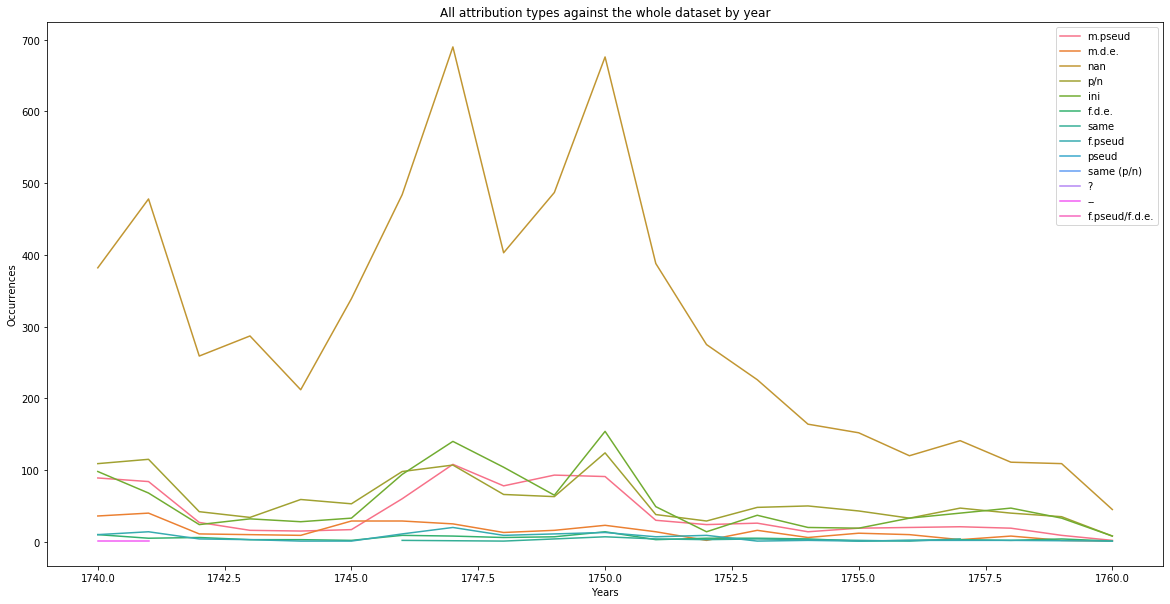

In [4]:
# data frame of attribute types across the whole data set
attr_types = vpd.attribution_types_df(df)

# plot the data
vpd.plot_attribution_types_line_plot(attr_types, "All attribution types against the whole dataset by year")


## Attribution types with n/a and artifacts removed

To create a cleaner graph, I've removed the non attributed poems and what 
look like data creation artifacts, i.e. low digit occurrences.

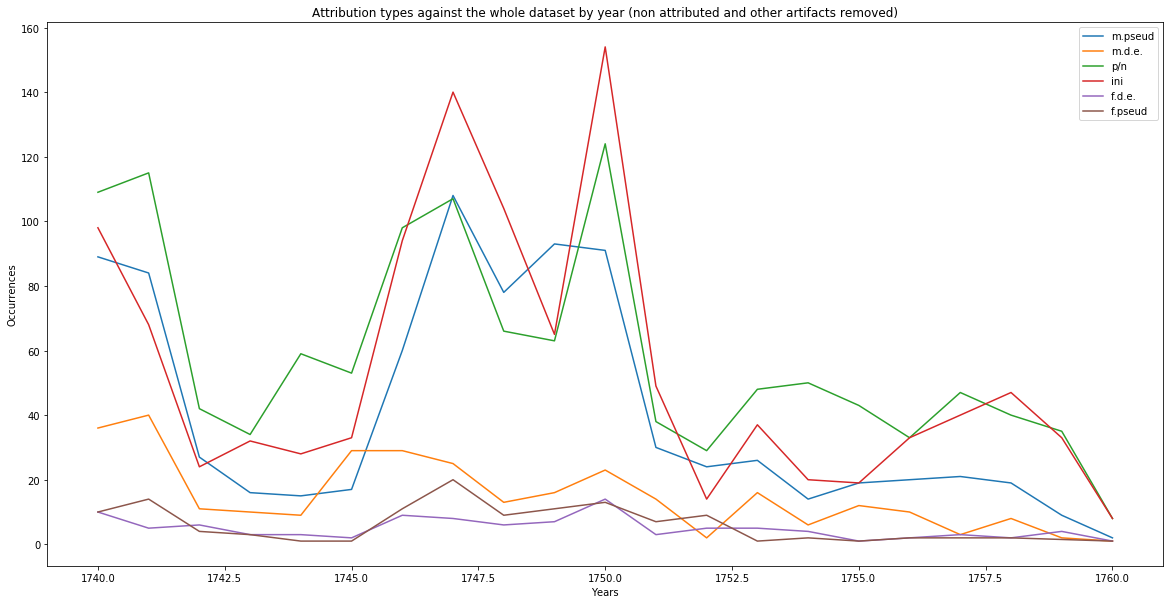

In [5]:
# remove non attributed and data collection artifacts to get a cleaner picture
attr_types_subset = attr_types.drop([ 'nan', 'same', 'pseud', 'same (p/n)', '?', '--', 'f.pseud/f.d.e.'], axis=1)

# regenerate graph
vpd.plot_attribution_types_line_plot(attr_types_subset, 
                                    "Attribution types against the whole dataset by year (non attributed and other artifacts removed)")

## Attribution types by gender over the dataset by year

We merge the 'm.pseud' and 'm.d.e.' columns into a new 'male columns; we also merge the 'f.pseud' and 'f.d.e.'
columns into a new 'female. We then drop the other columns. This might not be ideal since the 'p/n' and 'ini' 
might have gender that needs unpicking.

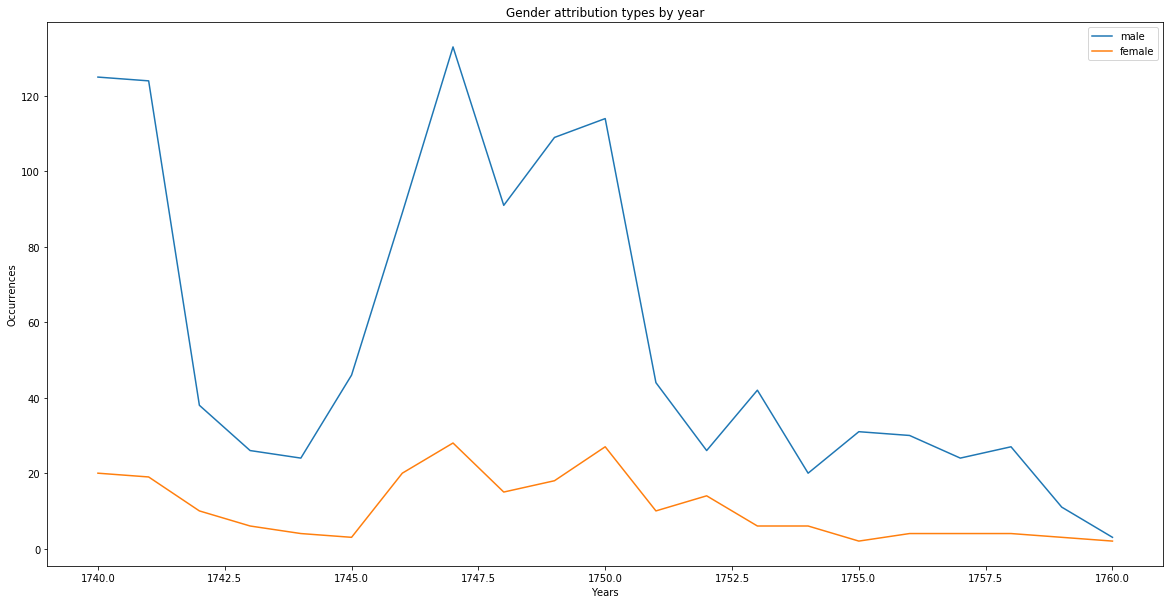

In [6]:
attr_types_subset['male'] = attr_types_subset['m.pseud'] + attr_types_subset['m.d.e.']
attr_types_subset['female'] = attr_types_subset['f.pseud'] + attr_types_subset['f.d.e.']
attr_types_subset = attr_types_subset.drop(['m.pseud', 'm.d.e.', 'p/n', 'ini', 'f.d.e.', 'f.pseud'], axis=1)

# regenerate graph
vpd.plot_attribution_types_line_plot(attr_types_subset, "Gender attribution types by year")